In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

population_df = pd.read_csv("data/csv_result/population_cleaned.csv")
population_json_df = pd.read_csv("data/csv_result/population_json_cleaned.csv")
population_sql_df = pd.read_csv("data/csv_result/population_sql_cleaned.csv")
population_xml_df = pd.read_csv("data/csv_result/population_xml_cleaned.csv")
projects_df = pd.read_csv("data/csv_result/projects_cleaned.csv")
merged_df = pd.read_csv("data/csv_result/merged_cleaned.csv")

C:\Users\Dans\AppData\Local\Temp\ipykernel_756\4048973555.py:5: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_df = pd.read_csv("data/csv_result/projects_cleaned.csv")


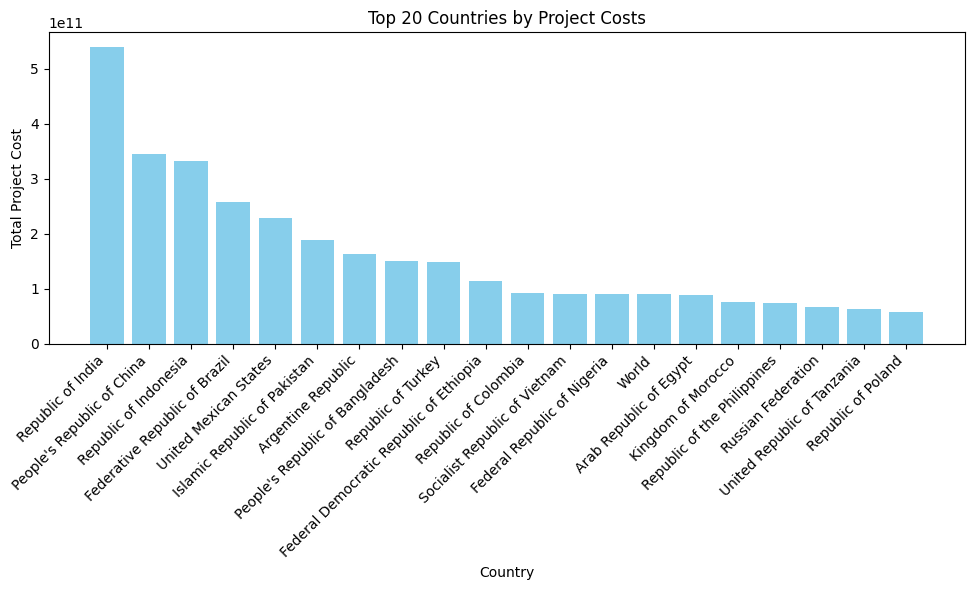

In [3]:
# Group the data by country and sum the project costs
total_project_costs = projects_df.groupby('countryname')['project_cost'].sum().reset_index()

# Sort the data by total project cost in descending order and select the top 20 countries
top_20_countries = total_project_costs.nlargest(20, 'project_cost')

# Create a bar plot of total project costs for the top 20 countries
plt.figure(figsize=(10, 6))
plt.bar(top_20_countries['countryname'], top_20_countries['project_cost'], color='skyblue')
plt.title('Top 20 Countries by Project Costs')
plt.xlabel('Country')
plt.ylabel('Total Project Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()

Dari data di atas, kita dapat melihat bahwa beberapa negara memiliki total biaya proyek yang signifikan. Berikut adalah beberapa wawasan dari data tersebut:

1. India memiliki total biaya proyek yang paling tinggi, dengan nilai sekitar 5.387990 triliun dolar AS.
2. China berada di posisi kedua dengan total biaya proyek sekitar 3.451482 triliun dolar AS.
3. Indonesia berada di peringkat ketiga dengan total biaya proyek sekitar 3.319903 triliun dolar AS.
4. Brasil, Meksiko, dan Pakistan juga memiliki total biaya proyek yang cukup tinggi, masing-masing di atas 2 triliun dolar AS.
5. Negara-negara seperti Bangladesh, Turki, dan Ethiopia juga memiliki total biaya proyek yang signifikan, masing-masing di atas 1 triliun dolar AS.

Wawasan ini memberikan gambaran tentang distribusi biaya proyek di beberapa negara tertentu dan dapat menjadi dasar untuk analisis lebih lanjut tentang investasi dan pembangunan di tingkat internasional.

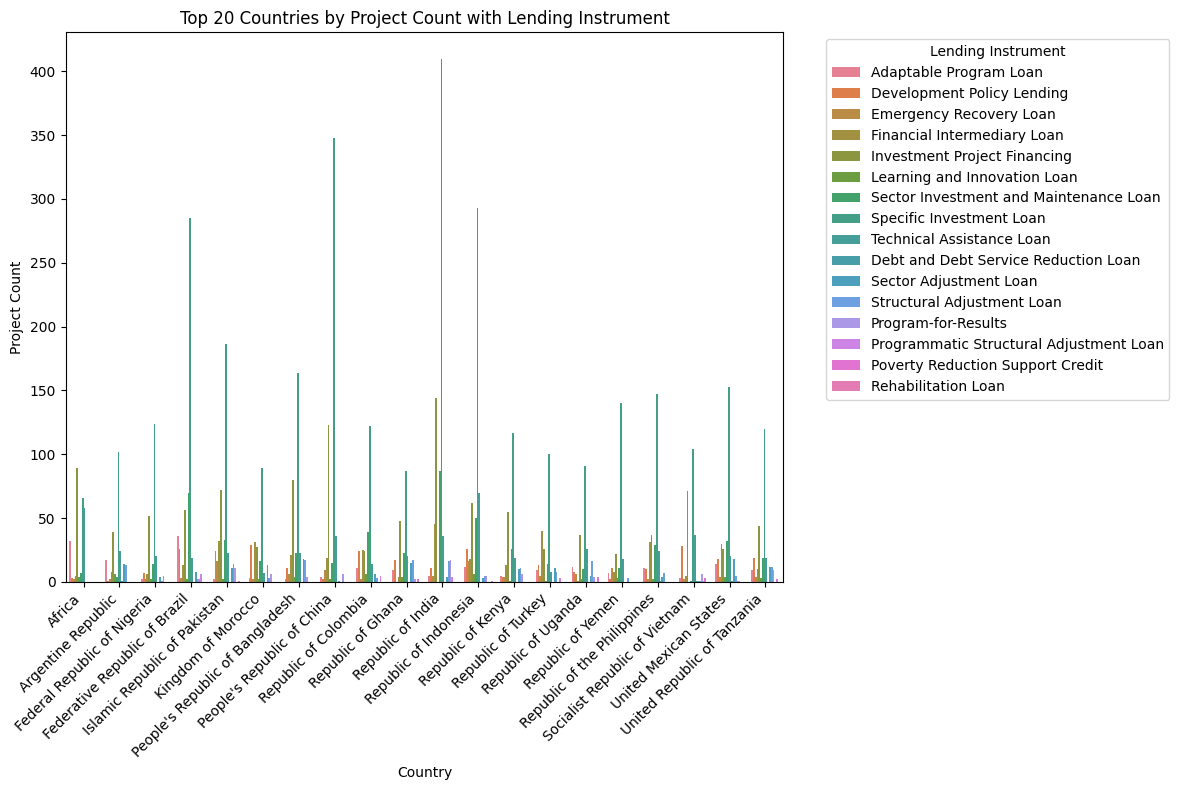

In [4]:
# Group data by countryname and lendinginstr, then count the number of projects

grouped_df = projects_df.groupby(['countryname', 'lendinginstr']).size().reset_index(name='project_count')

# Sort the DataFrame by project_count and select the top 20 countries
top_20_countries = grouped_df.groupby('countryname').sum().nlargest(20, 'project_count').index

# Filter the DataFrame to include only the top 20 countries
top_20_data = grouped_df[grouped_df['countryname'].isin(top_20_countries)]

filtered_data = top_20_data[top_20_data['lendinginstr'] != 'UNIDENTIFIED']

# Create the visualization using bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='countryname', y='project_count', hue='lendinginstr')
plt.title('Top 20 Countries by Project Count with Lending Instrument')
plt.xlabel('Country')
plt.ylabel('Project Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Lending Instrument', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Kita dapat melihat pola penggunaan instrumen pemberian pinjaman di berbagai negara. Berikut beberapa insight yang bisa diambil dari data tersebut:

1. **Brazil**:
   - Negara ini mengandalkan banyak jenis instrumen pemberian pinjaman, dengan jumlah proyek tertinggi pada pinjaman spesifik investasi (285 proyek).
   - Instrumen pemberian pinjaman yang paling sering digunakan adalah pinjaman spesifik investasi dan pinjaman program yang memiliki 285 dan 70 proyek berturut-turut.

2. **China**:
   - Tampaknya China sangat aktif dalam mendukung proyek-proyek investasi, dengan jumlah proyek tertinggi pada pinjaman spesifik investasi (348 proyek) dan pinjaman untuk pembiayaan proyek investasi (123 proyek).
   - Instrumen pemberian pinjaman yang paling sering digunakan adalah pinjaman spesifik investasi dan pinjaman untuk pembiayaan proyek investasi.

3. **India**:
   - India juga sangat aktif dalam menggunakan instrumen pemberian pinjaman untuk mendukung proyek-proyek investasi, dengan jumlah proyek tertinggi pada pinjaman spesifik investasi (410 proyek) dan pinjaman untuk pembiayaan proyek investasi (144 proyek).
   - Instrumen pemberian pinjaman yang paling sering digunakan adalah pinjaman spesifik investasi dan pinjaman untuk pembiayaan proyek investasi.

4. **Indonesia**:
   - Instrumen pemberian pinjaman yang paling sering digunakan di Indonesia adalah pinjaman spesifik investasi (293 proyek) dan pinjaman untuk pembiayaan proyek investasi (62 proyek).
   - Terdapat juga penggunaan yang signifikan pada pinjaman bantuan teknis (70 proyek) yang menunjukkan fokus pada pengembangan kapasitas dan peningkatan kualitas proyek.

5. **Pakistan**:
   - Instrumen pemberian pinjaman yang paling sering digunakan di Pakistan adalah pinjaman spesifik investasi (186 proyek) dan pinjaman untuk pembiayaan proyek investasi (72 proyek).
   - Terdapat fokus yang signifikan pada pinjaman untuk pengurangan kemiskinan (1 proyek) dan pinjaman bantuan teknis (23 proyek).

Dengan memahami pola penggunaan instrumen pemberian pinjaman di berbagai negara, kita dapat mengidentifikasi prioritas pengembangan dan mengarahkan sumber daya dengan lebih efektif sesuai dengan kebutuhan masing-masing negara.

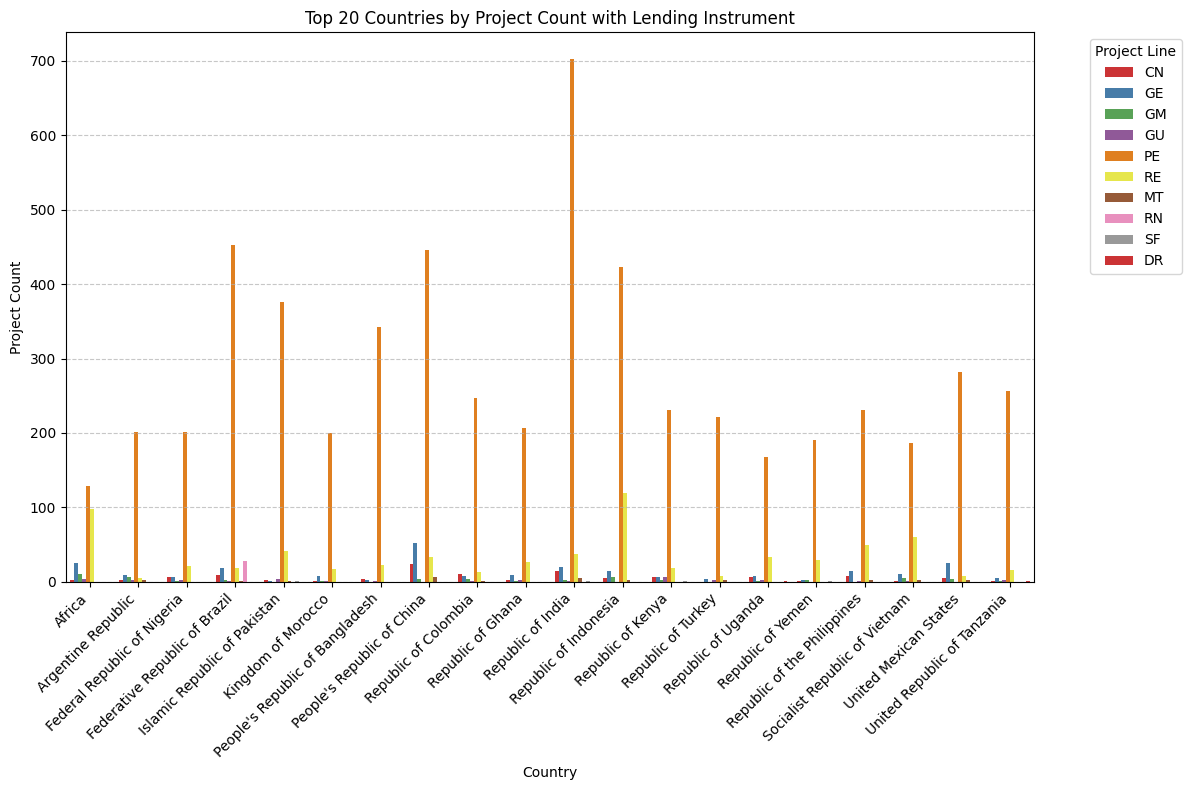

In [5]:
# Group data by countryname and prodline, then count the number of projects
grouped_df = projects_df.groupby(['countryname', 'prodline']).size().reset_index(name='project_count')

# Sort the DataFrame by project_count and select the top 20 countries
top_20_countries = grouped_df.groupby('countryname').sum().nlargest(20, 'project_count').index

# Filter the DataFrame to include only the top 20 countries
top_20_data = grouped_df[grouped_df['countryname'].isin(top_20_countries)]

# Create the visualization using bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_data, x='countryname', y='project_count', hue='prodline', palette='Set1')
plt.title('Top 20 Countries by Project Count with Lending Instrument')
plt.xlabel('Country')
plt.ylabel('Project Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Project Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

Terdapat beberapa insight menarik:

1. **Argentina**: Argentina memiliki jumlah proyek tertinggi dalam kategori "PE" (Private Sector), dengan total 202 proyek.
2. **Bangladesh**: Bangladesh memiliki jumlah proyek tertinggi dalam kategori "PE" (Private Sector), dengan total 343 proyek.
3. **Brasil**: Brasil memiliki jumlah proyek tertinggi dalam kategori "PE" (Private Sector), dengan total 453 proyek.
4. **China**: China memiliki jumlah proyek tertinggi dalam kategori "PE" (Private Sector), dengan total 446 proyek.
5. **India**: India memiliki jumlah proyek tertinggi dalam kategori "PE" (Private Sector), dengan total 703 proyek.

Dari insight di atas, dapat dilihat bahwa sebagian besar proyek di negara-negara tersebut dilakukan dalam sektor swasta ("PE"). Hal ini menunjukkan pentingnya investasi swasta dalam pembangunan infrastruktur dan proyek-proyek pembangunan di negara-negara tersebut.

In [6]:

# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
# Set display options
pd.set_option('display.max_rows', None) # Show all rows 
pd.set_option('display.width', None) # Auto-adjust width to display all columns
pd.set_option('display.max_colwidth', None) # Show full content of each column without truncation


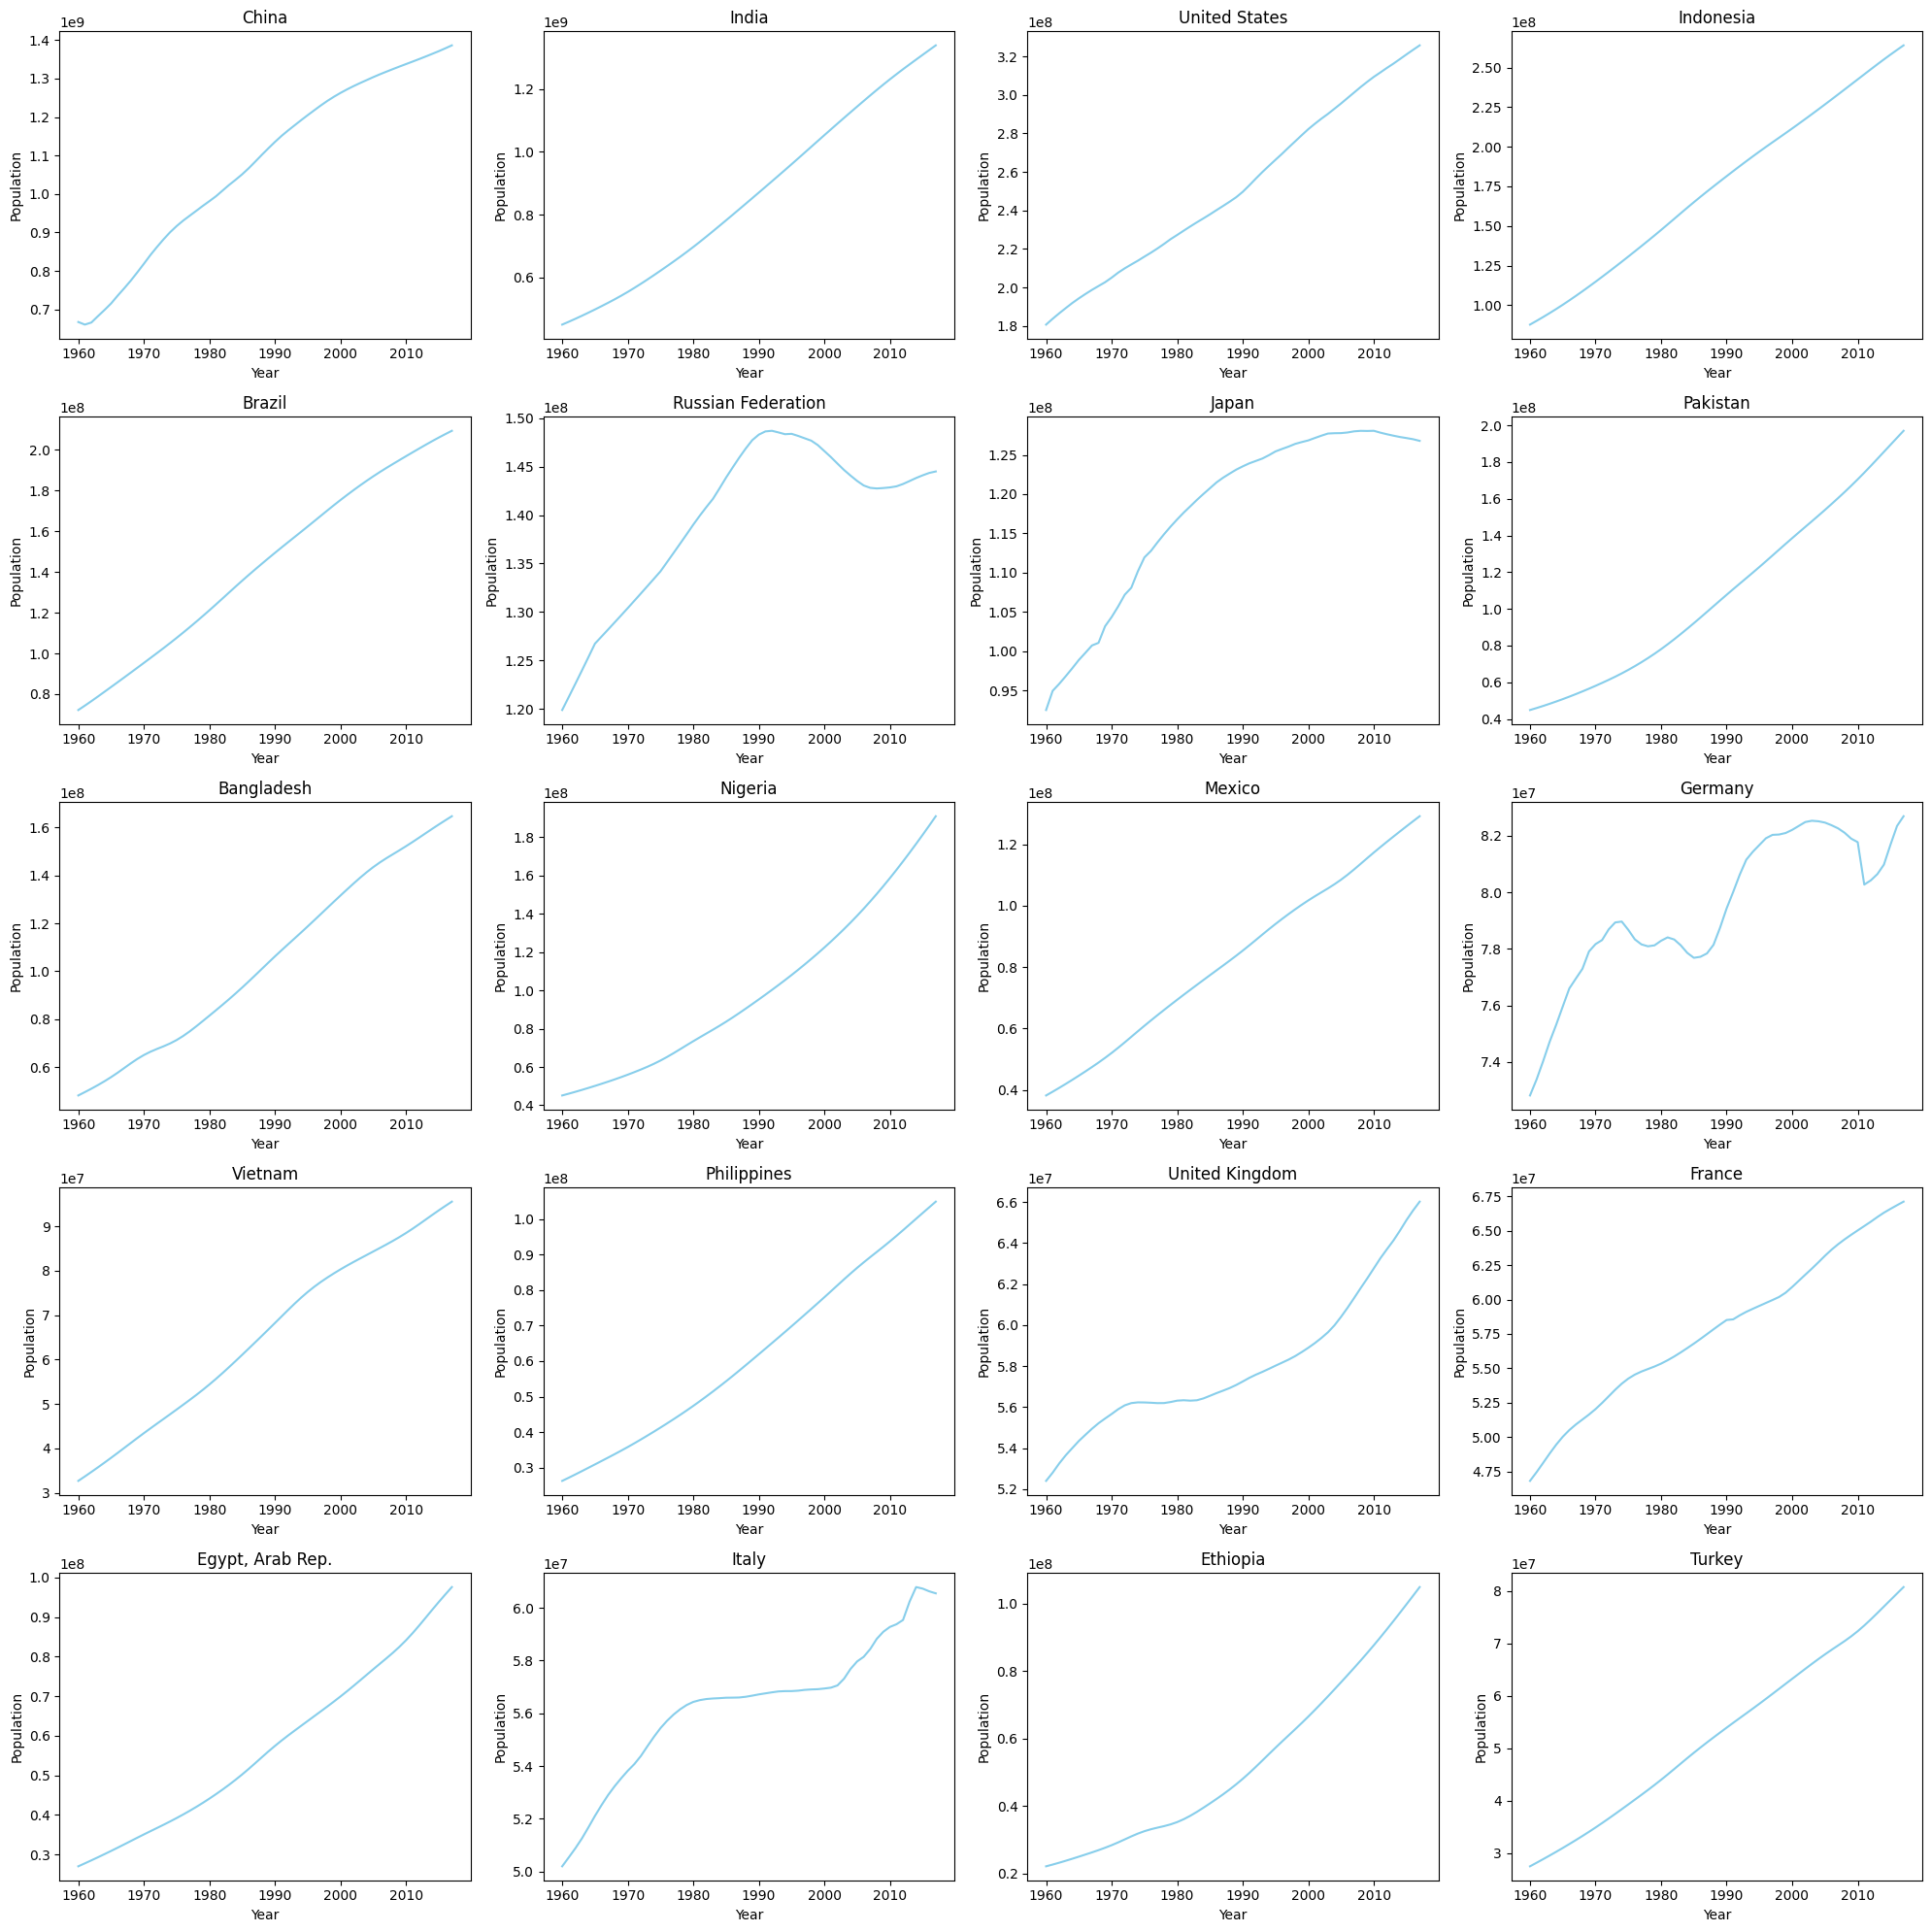

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'population_df'
# You may need to aggregate the population data by country before selecting the top 20

# Aggregate population data by country
country_population = population_df.groupby('country_name')['value'].sum().reset_index()
# Select top 20 countries by total population
top_20_countries = country_population.nlargest(20, 'value')

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each country's population in a subplot
for i, (country, population) in enumerate(zip(top_20_countries['country_name'], top_20_countries['value'])):
    # Filter data for the current country
    country_data = population_df[population_df['country_name'] == country]
    # Plot population trend over years for the current country
    axes[i].plot(country_data['year'].values, country_data['value'].values, color='skyblue')
    axes[i].set_title(country)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Population')

# Adjust layout
plt.tight_layout()
plt.show()


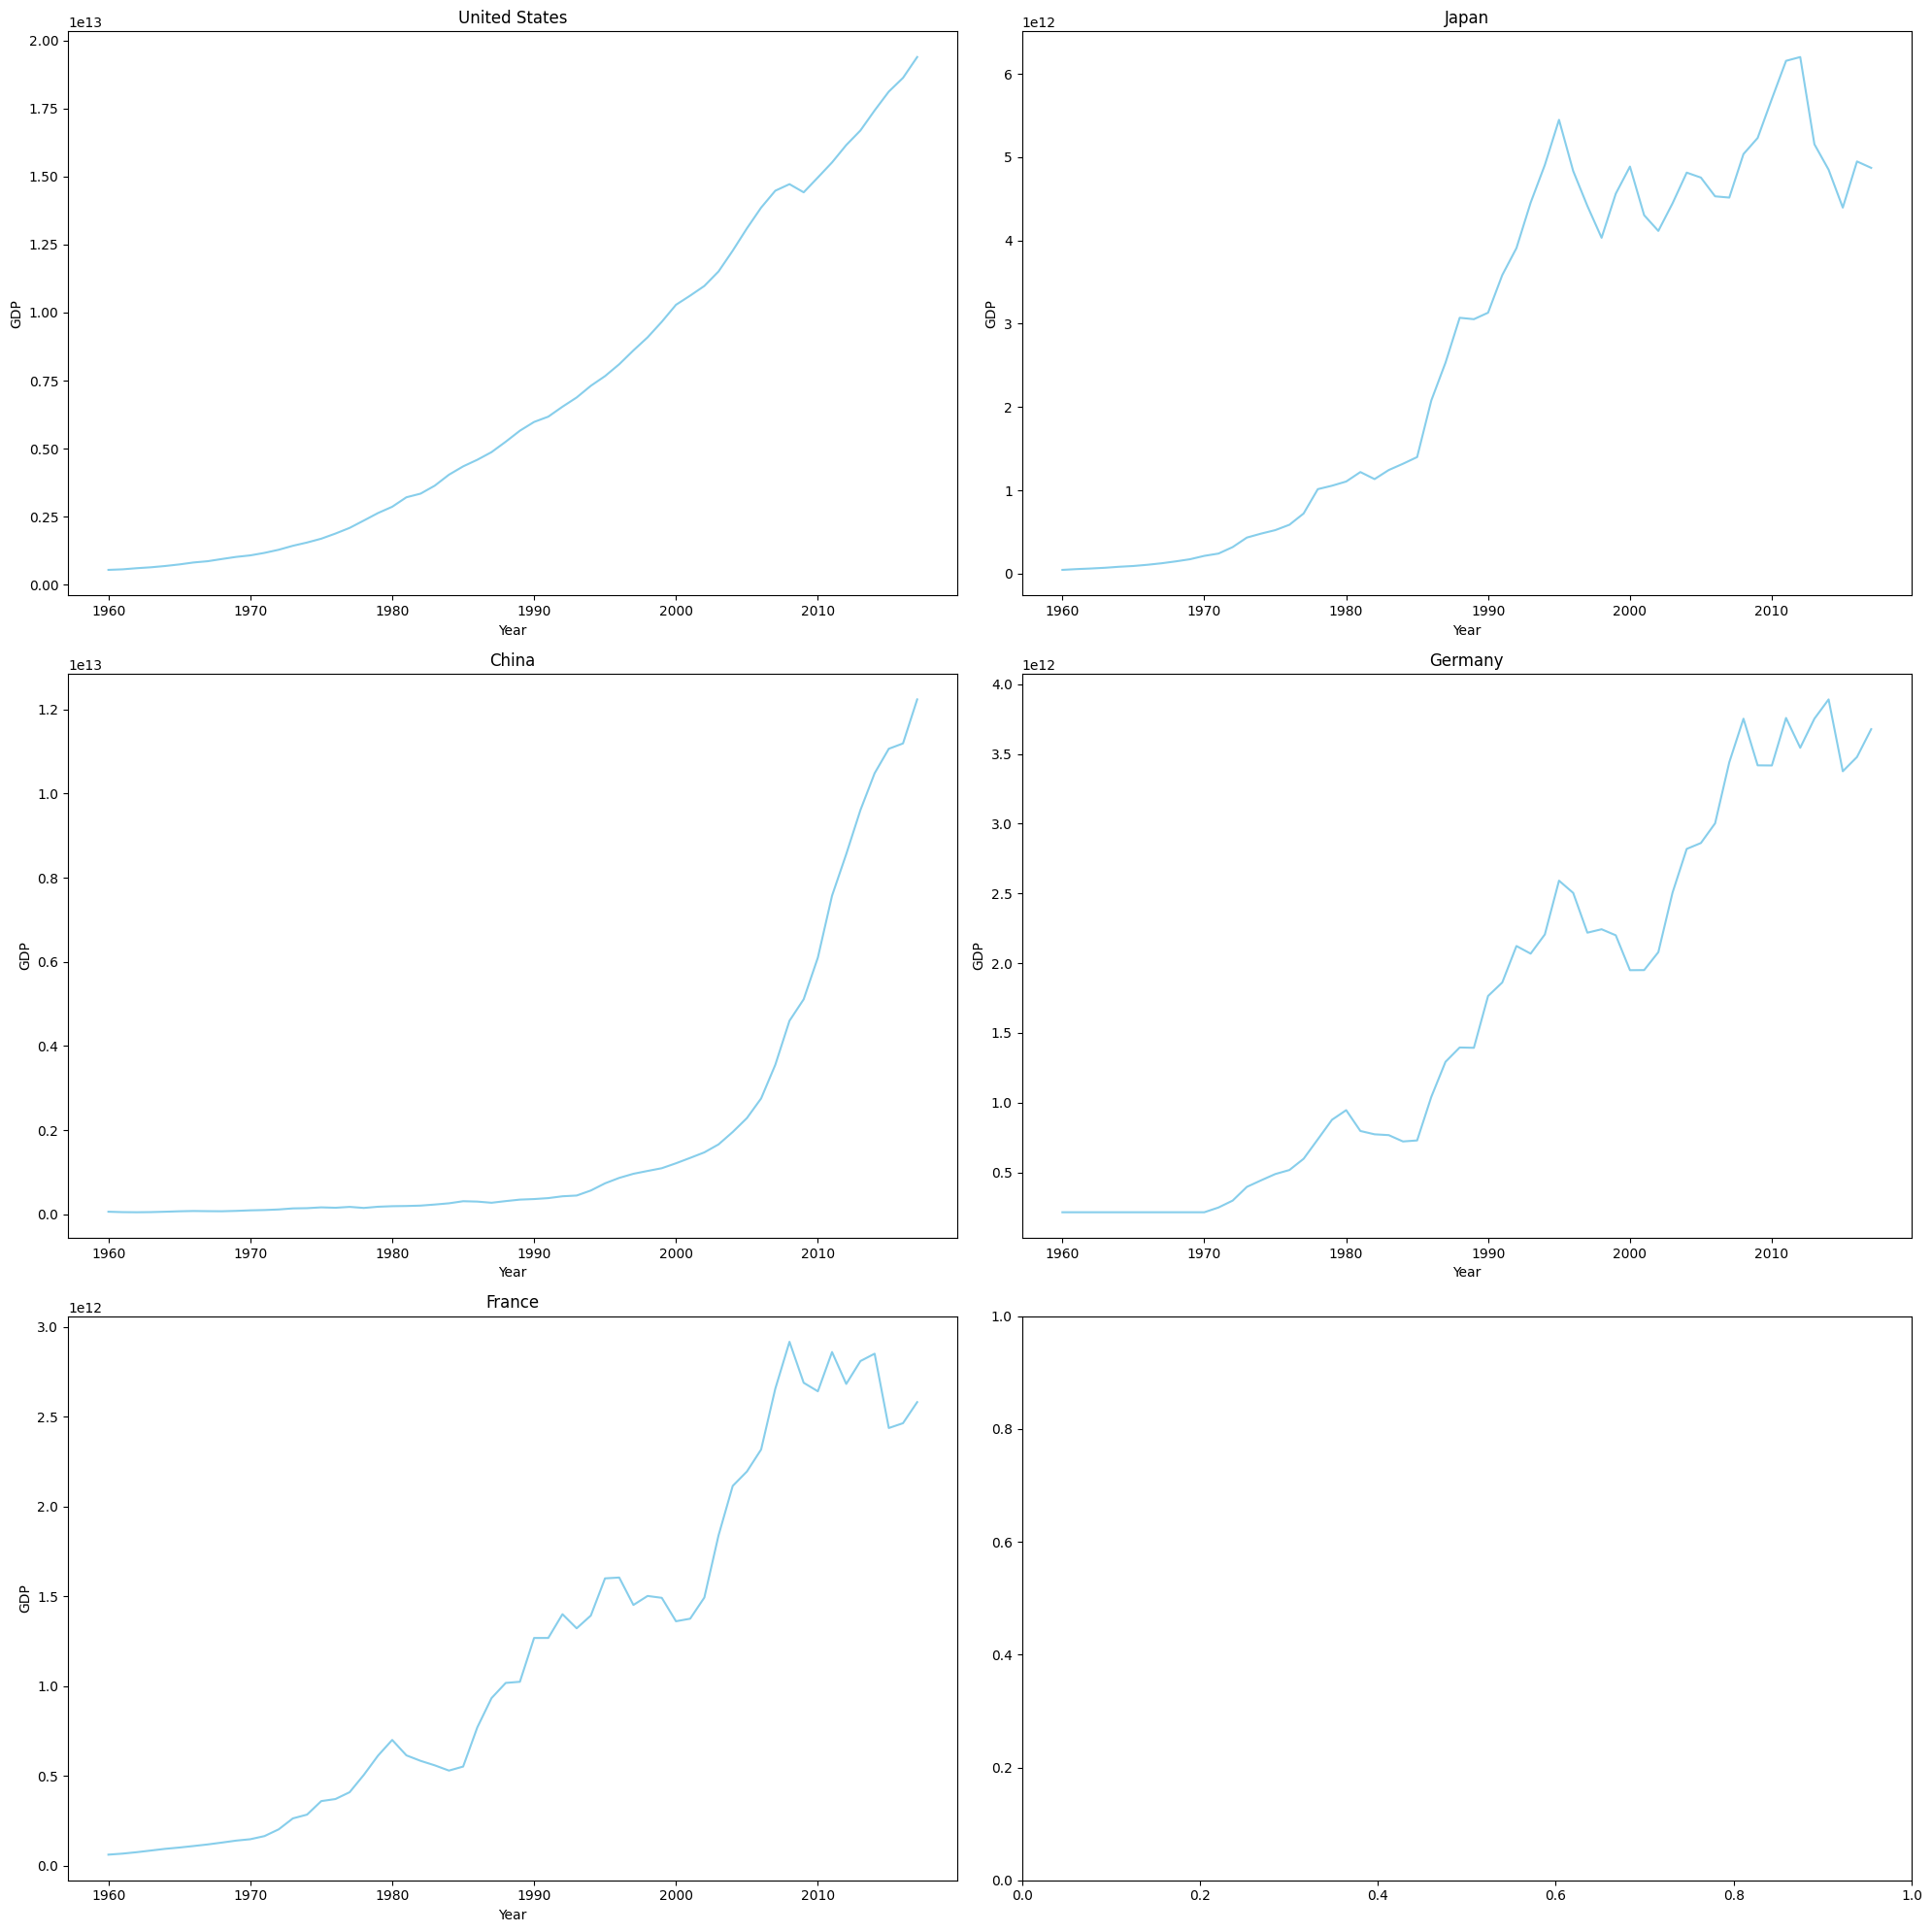

In [8]:
 

# Assuming your DataFrame is named 'merged_df'
# Aggregate GDP data by country
country_gdp = merged_df.groupby('country_name')['gdp'].sum().reset_index()
# Select top 5 countries by total GDP
top_5_countries_gdp = country_gdp.nlargest(5, 'gdp')

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each country's GDP in a subplot
for i, (country, gdp) in enumerate(zip(top_5_countries_gdp['country_name'], top_5_countries_gdp['gdp'])):
    # Filter data for the current country
    country_data_gdp = merged_df[merged_df['country_name'] == country]
    # Check if data for the current country is empty
    if not country_data_gdp.empty:
        # Plot GDP trend over years for the current country
        axes[i].plot(country_data_gdp['year'].values, country_data_gdp['gdp'].values, color='skyblue')
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('GDP')
    else:
        # Hide the subplot if data is empty
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()



Insight yang dapat diperoleh dari data GDP tersebut adalah pertumbuhan ekonomi yang signifikan di Tiongkok selama beberapa dekade terakhir. Dari tahun 1960 hingga 2017, Tiongkok telah mengalami lonjakan yang luar biasa dalam GDP-nya, menempatkannya sebagai salah satu kekuatan ekonomi terbesar di dunia saat ini. Pada awal periode tersebut, GDP Tiongkok jauh di bawah negara-negara maju lainnya seperti Amerika Serikat, Jepang, Jerman, dan Prancis. Namun, seiring berjalannya waktu, Tiongkok berhasil mengejar dan bahkan melampaui beberapa dari negara-negara ini dalam hal pertumbuhan ekonomi.

Selain itu, data juga menunjukkan konsistensi pertumbuhan ekonomi yang tinggi di Jepang dan Amerika Serikat selama periode tersebut, meskipun dengan variasi yang terjadi dari tahun ke tahun. Jerman dan Prancis juga menunjukkan pertumbuhan yang stabil, meskipun tidak secepat Tiongkok, Jepang, dan Amerika Serikat.

Insight lainnya adalah bahwa pertumbuhan ekonomi tidak selalu linier, dengan beberapa tahun mengalami peningkatan yang signifikan dan beberapa tahun lainnya mengalami perlambatan atau bahkan kontraksi. Faktor-faktor seperti resesi global, perubahan kebijakan ekonomi, dan peristiwa politik dapat memengaruhi performa ekonomi suatu negara dari waktu ke waktu.

Pentingnya memperhatikan perubahan dalam pola pertumbuhan ekonomi ini dapat membantu dalam merencanakan kebijakan ekonomi yang tepat serta mengantisipasi dampaknya terhadap perekonomian global secara keseluruhan.

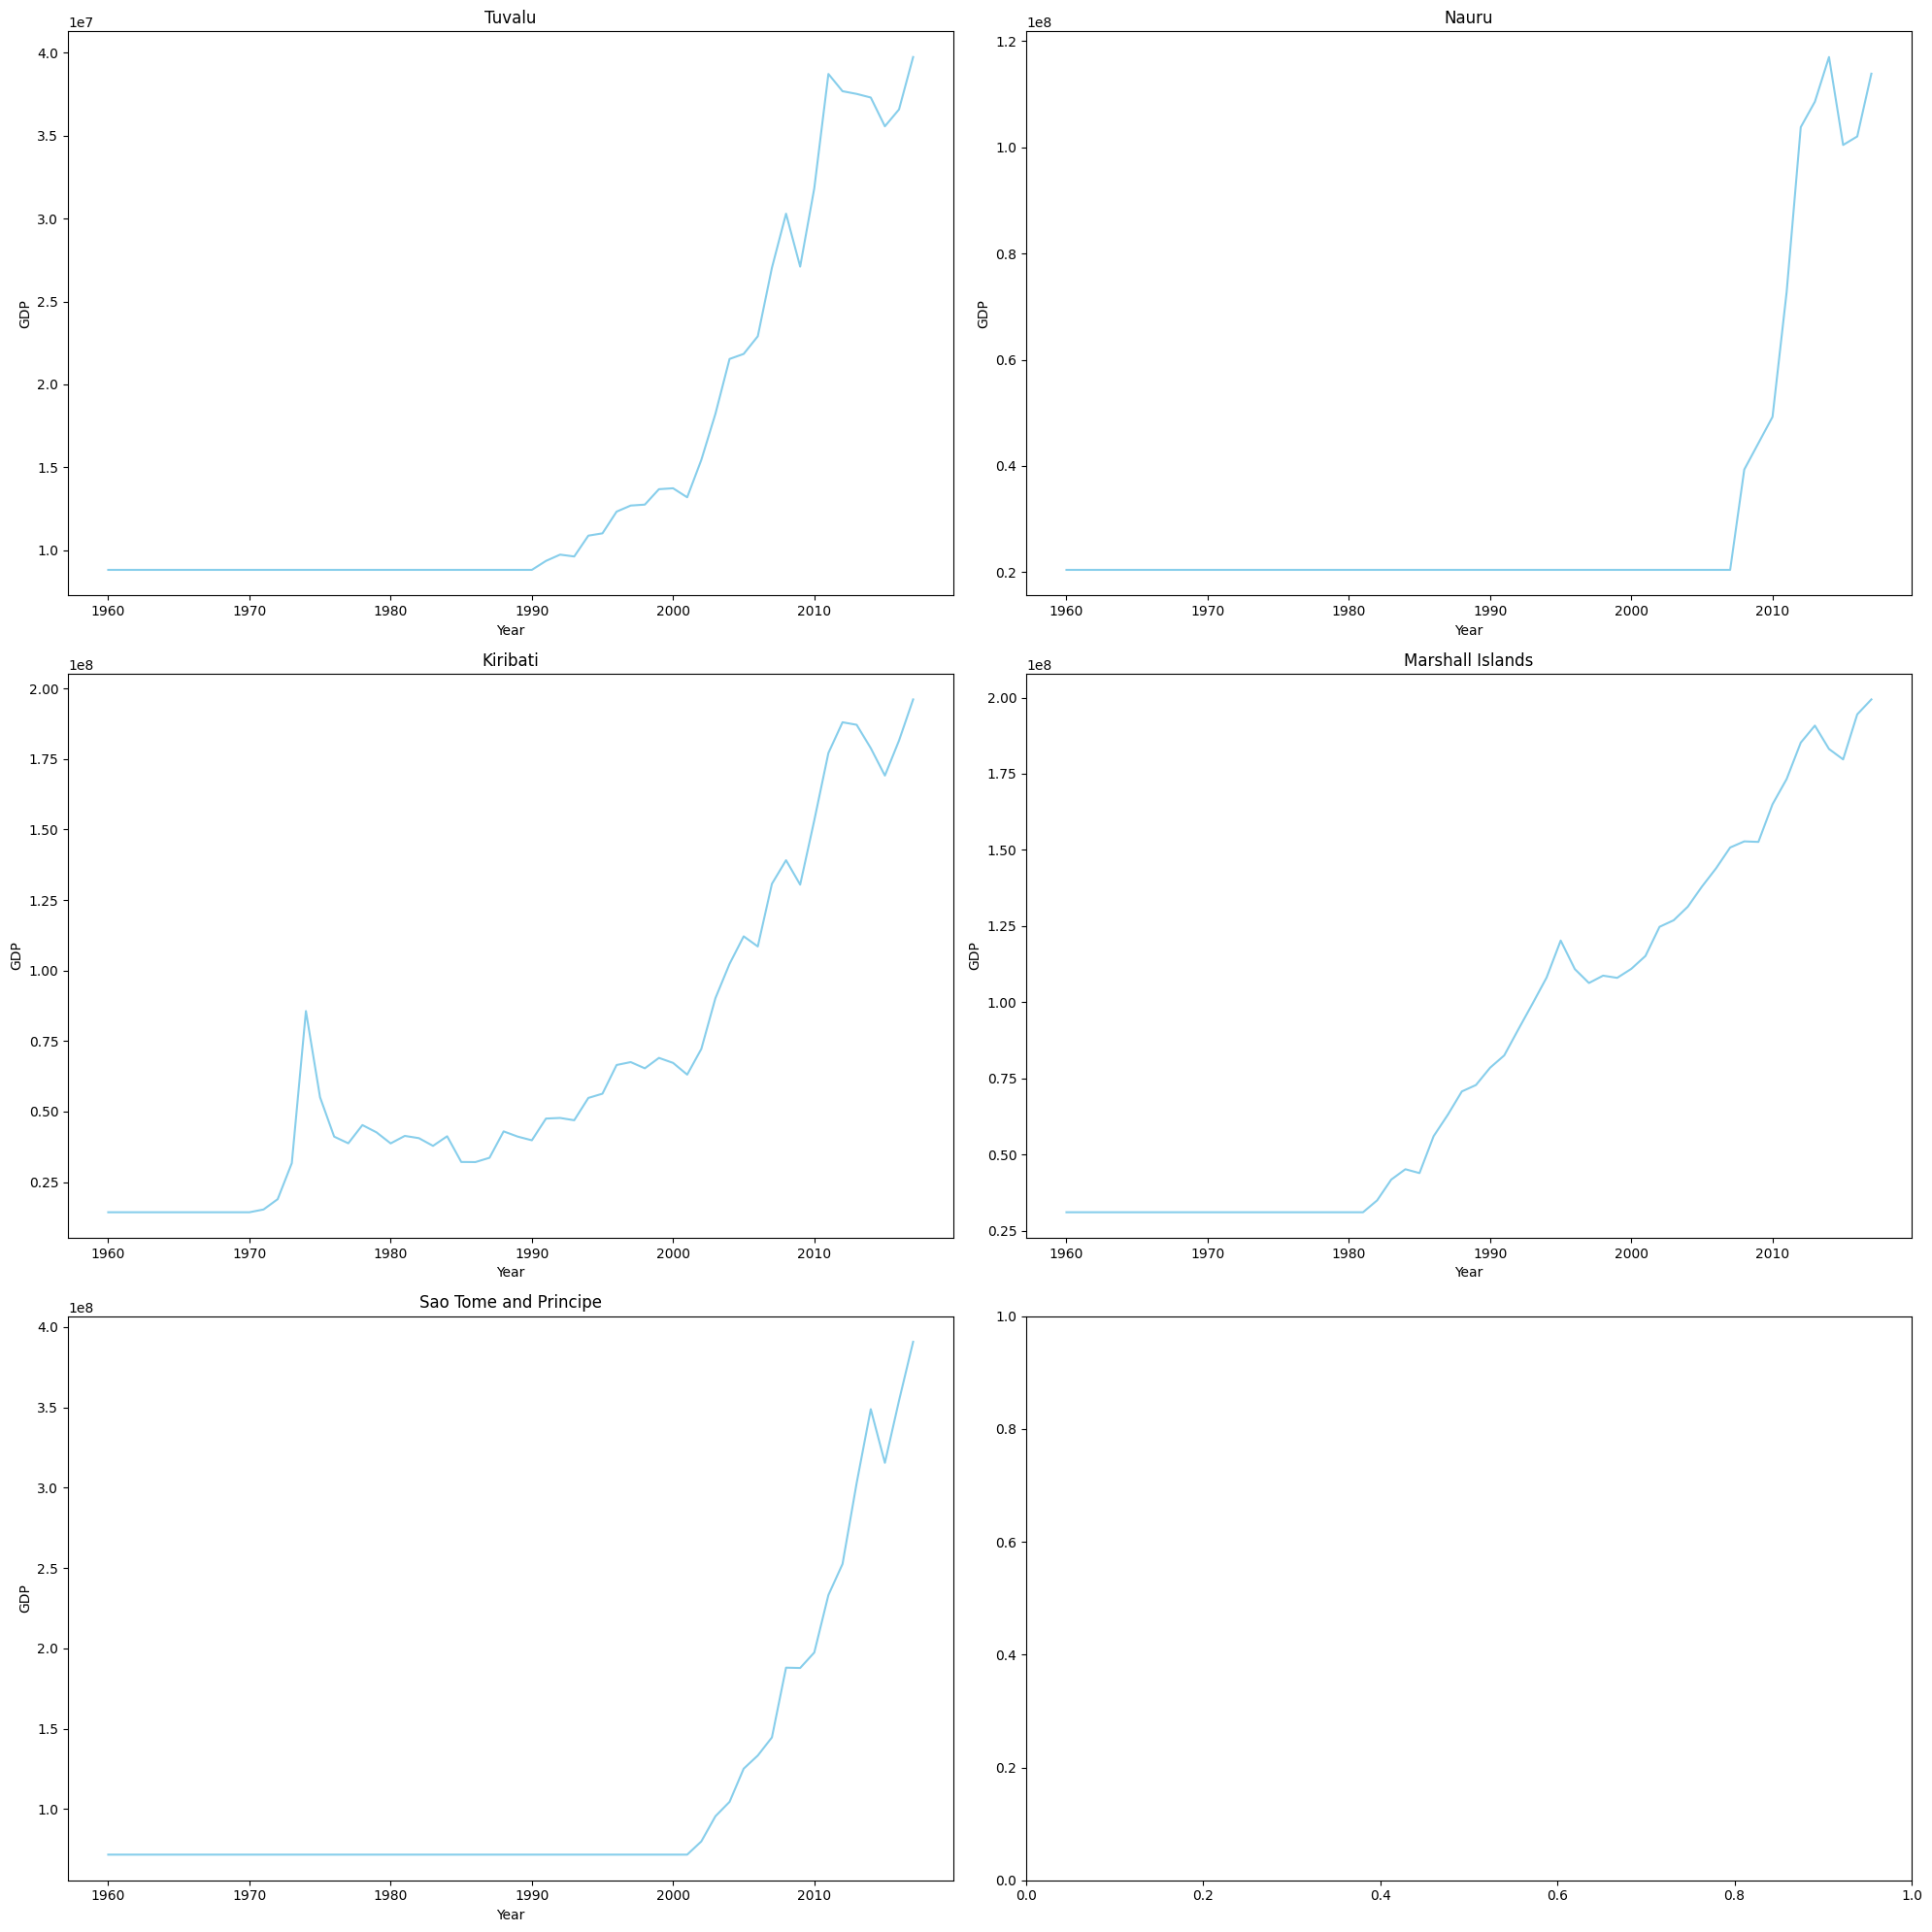

In [9]:
 
# Assuming your DataFrame is named 'merged_df'
# Aggregate GDP data by country
country_gdp = merged_df.groupby('country_name')['gdp'].sum().reset_index()
# Select top 5 countries by total GDP
top_5_countries_gdp = country_gdp.nsmallest(5, 'gdp')

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each country's GDP in a subplot
for i, (country, gdp) in enumerate(zip(top_5_countries_gdp['country_name'], top_5_countries_gdp['gdp'])):
    # Filter data for the current country
    country_data_gdp = merged_df[merged_df['country_name'] == country]
    # Check if data for the current country is empty
    if not country_data_gdp.empty:
        # Plot GDP trend over years for the current country
        axes[i].plot(country_data_gdp['year'].values, country_data_gdp['gdp'].values, color='skyblue')
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('GDP')
    else:
        # Hide the subplot if data is empty
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


Berdasarkan data yang diberikan, terlihat bahwa Nauru secara konsisten mempertahankan salah satu PDB terendah di antara negara-negara yang terdaftar selama bertahun-tahun. Meskipun mengalami fluktuasi, PDB Nauru tetap relatif rendah dibandingkan dengan negara-negara lain dalam kumpulan data tersebut.

Insight ini menunjukkan bahwa Nauru mungkin menghadapi tantangan atau batasan dalam pengembangan ekonomi, mungkin karena faktor seperti luas lahan yang kecil, sumber daya alam yang terbatas, dan ketergantungan pada beberapa industri. Memahami alasan di balik PDB Nauru yang secara konsisten rendah dapat memberikan wawasan berharga bagi pembuat kebijakan dan pemangku kepentingan yang bertujuan untuk mengatasi masalah ekonomi dan mempromosikan pembangunan yang berkelanjutan di negara tersebut.

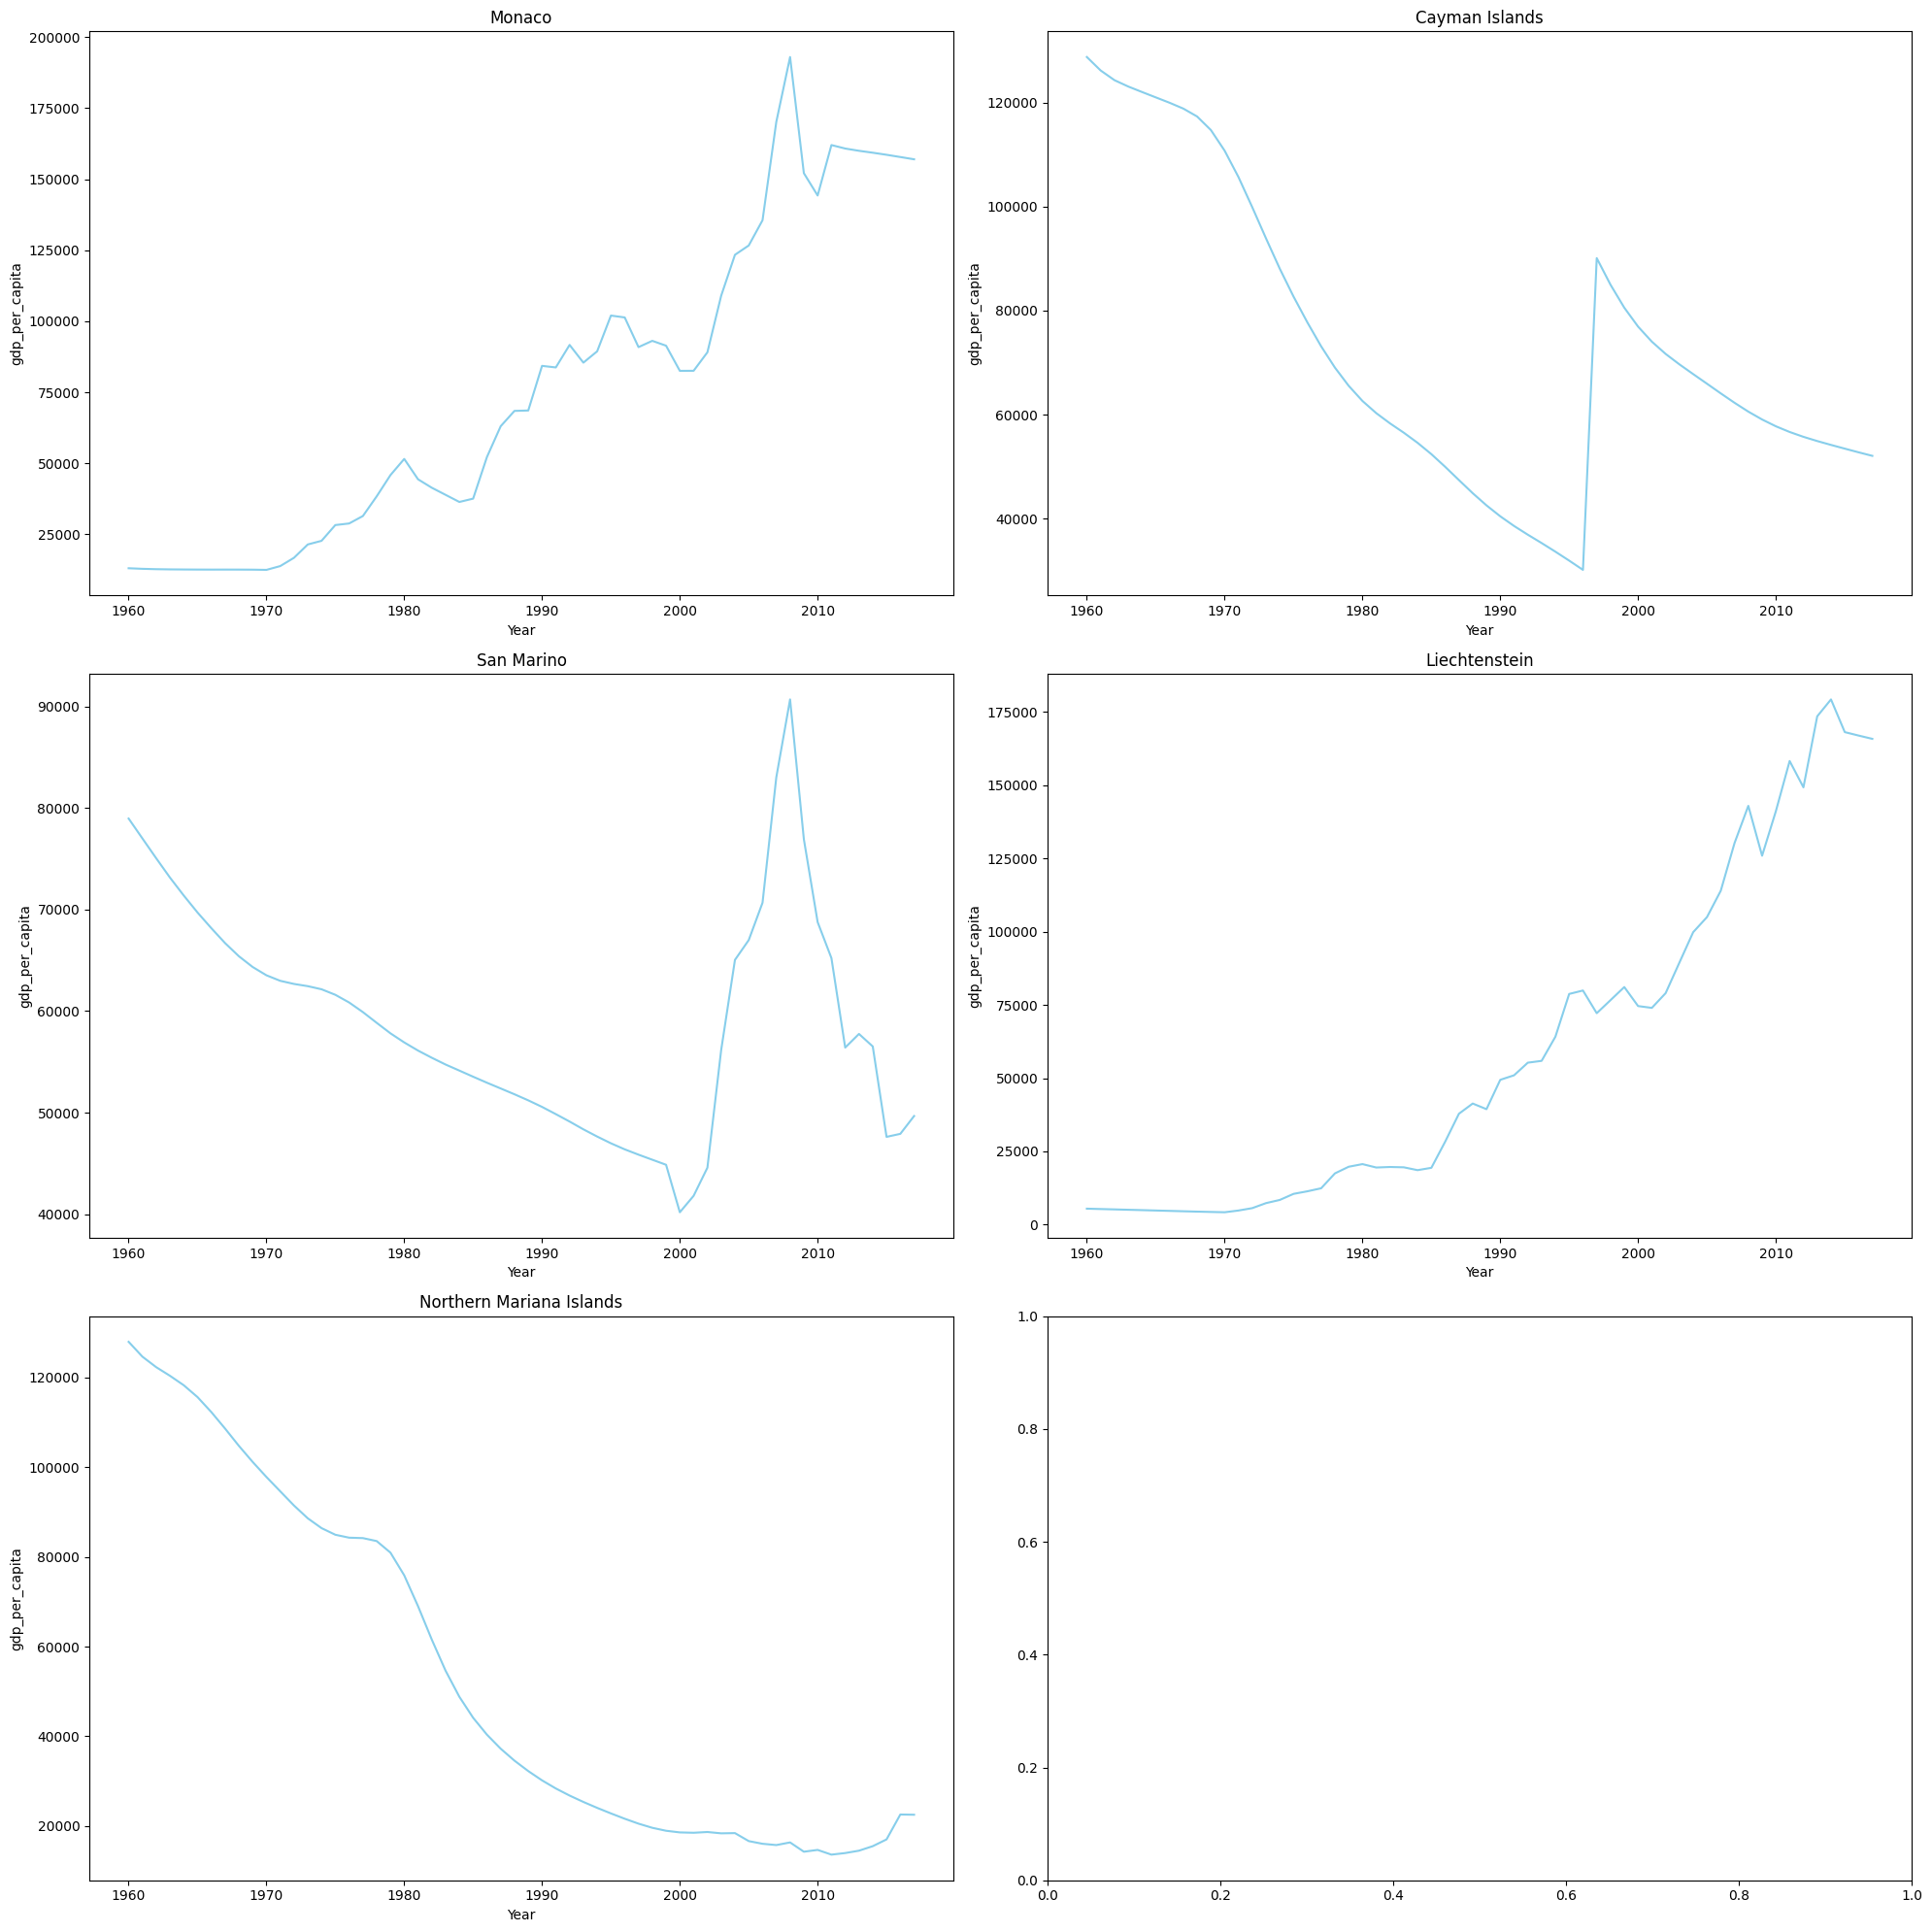

In [10]:
  

# Assuming your DataFrame is named 'merged_df'
# Aggregate gdp_per_capita data by country
country_gdp_per_capita = merged_df.groupby('country_name')['gdp_per_capita'].sum().reset_index()
# Select top 5 countries by total gdp_per_capita
top_5_countries_gdp_per_capita = country_gdp_per_capita.nlargest(5, 'gdp_per_capita')

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each country's gdp_per_capita in a subplot
for i, (country, gdp_per_capita) in enumerate(zip(top_5_countries_gdp_per_capita['country_name'], top_5_countries_gdp_per_capita['gdp_per_capita'])):
    # Filter data for the current country
    country_data_gdp_per_capita = merged_df[merged_df['country_name'] == country]
    # Check if data for the current country is empty
    if not country_data_gdp_per_capita.empty:
        # Plot gdp_per_capita trend over years for the current country
        axes[i].plot(country_data_gdp_per_capita['year'].values, country_data_gdp_per_capita['gdp_per_capita'].values, color='skyblue')
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('gdp_per_capita')
    else:
        # Hide the subplot if data is empty
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


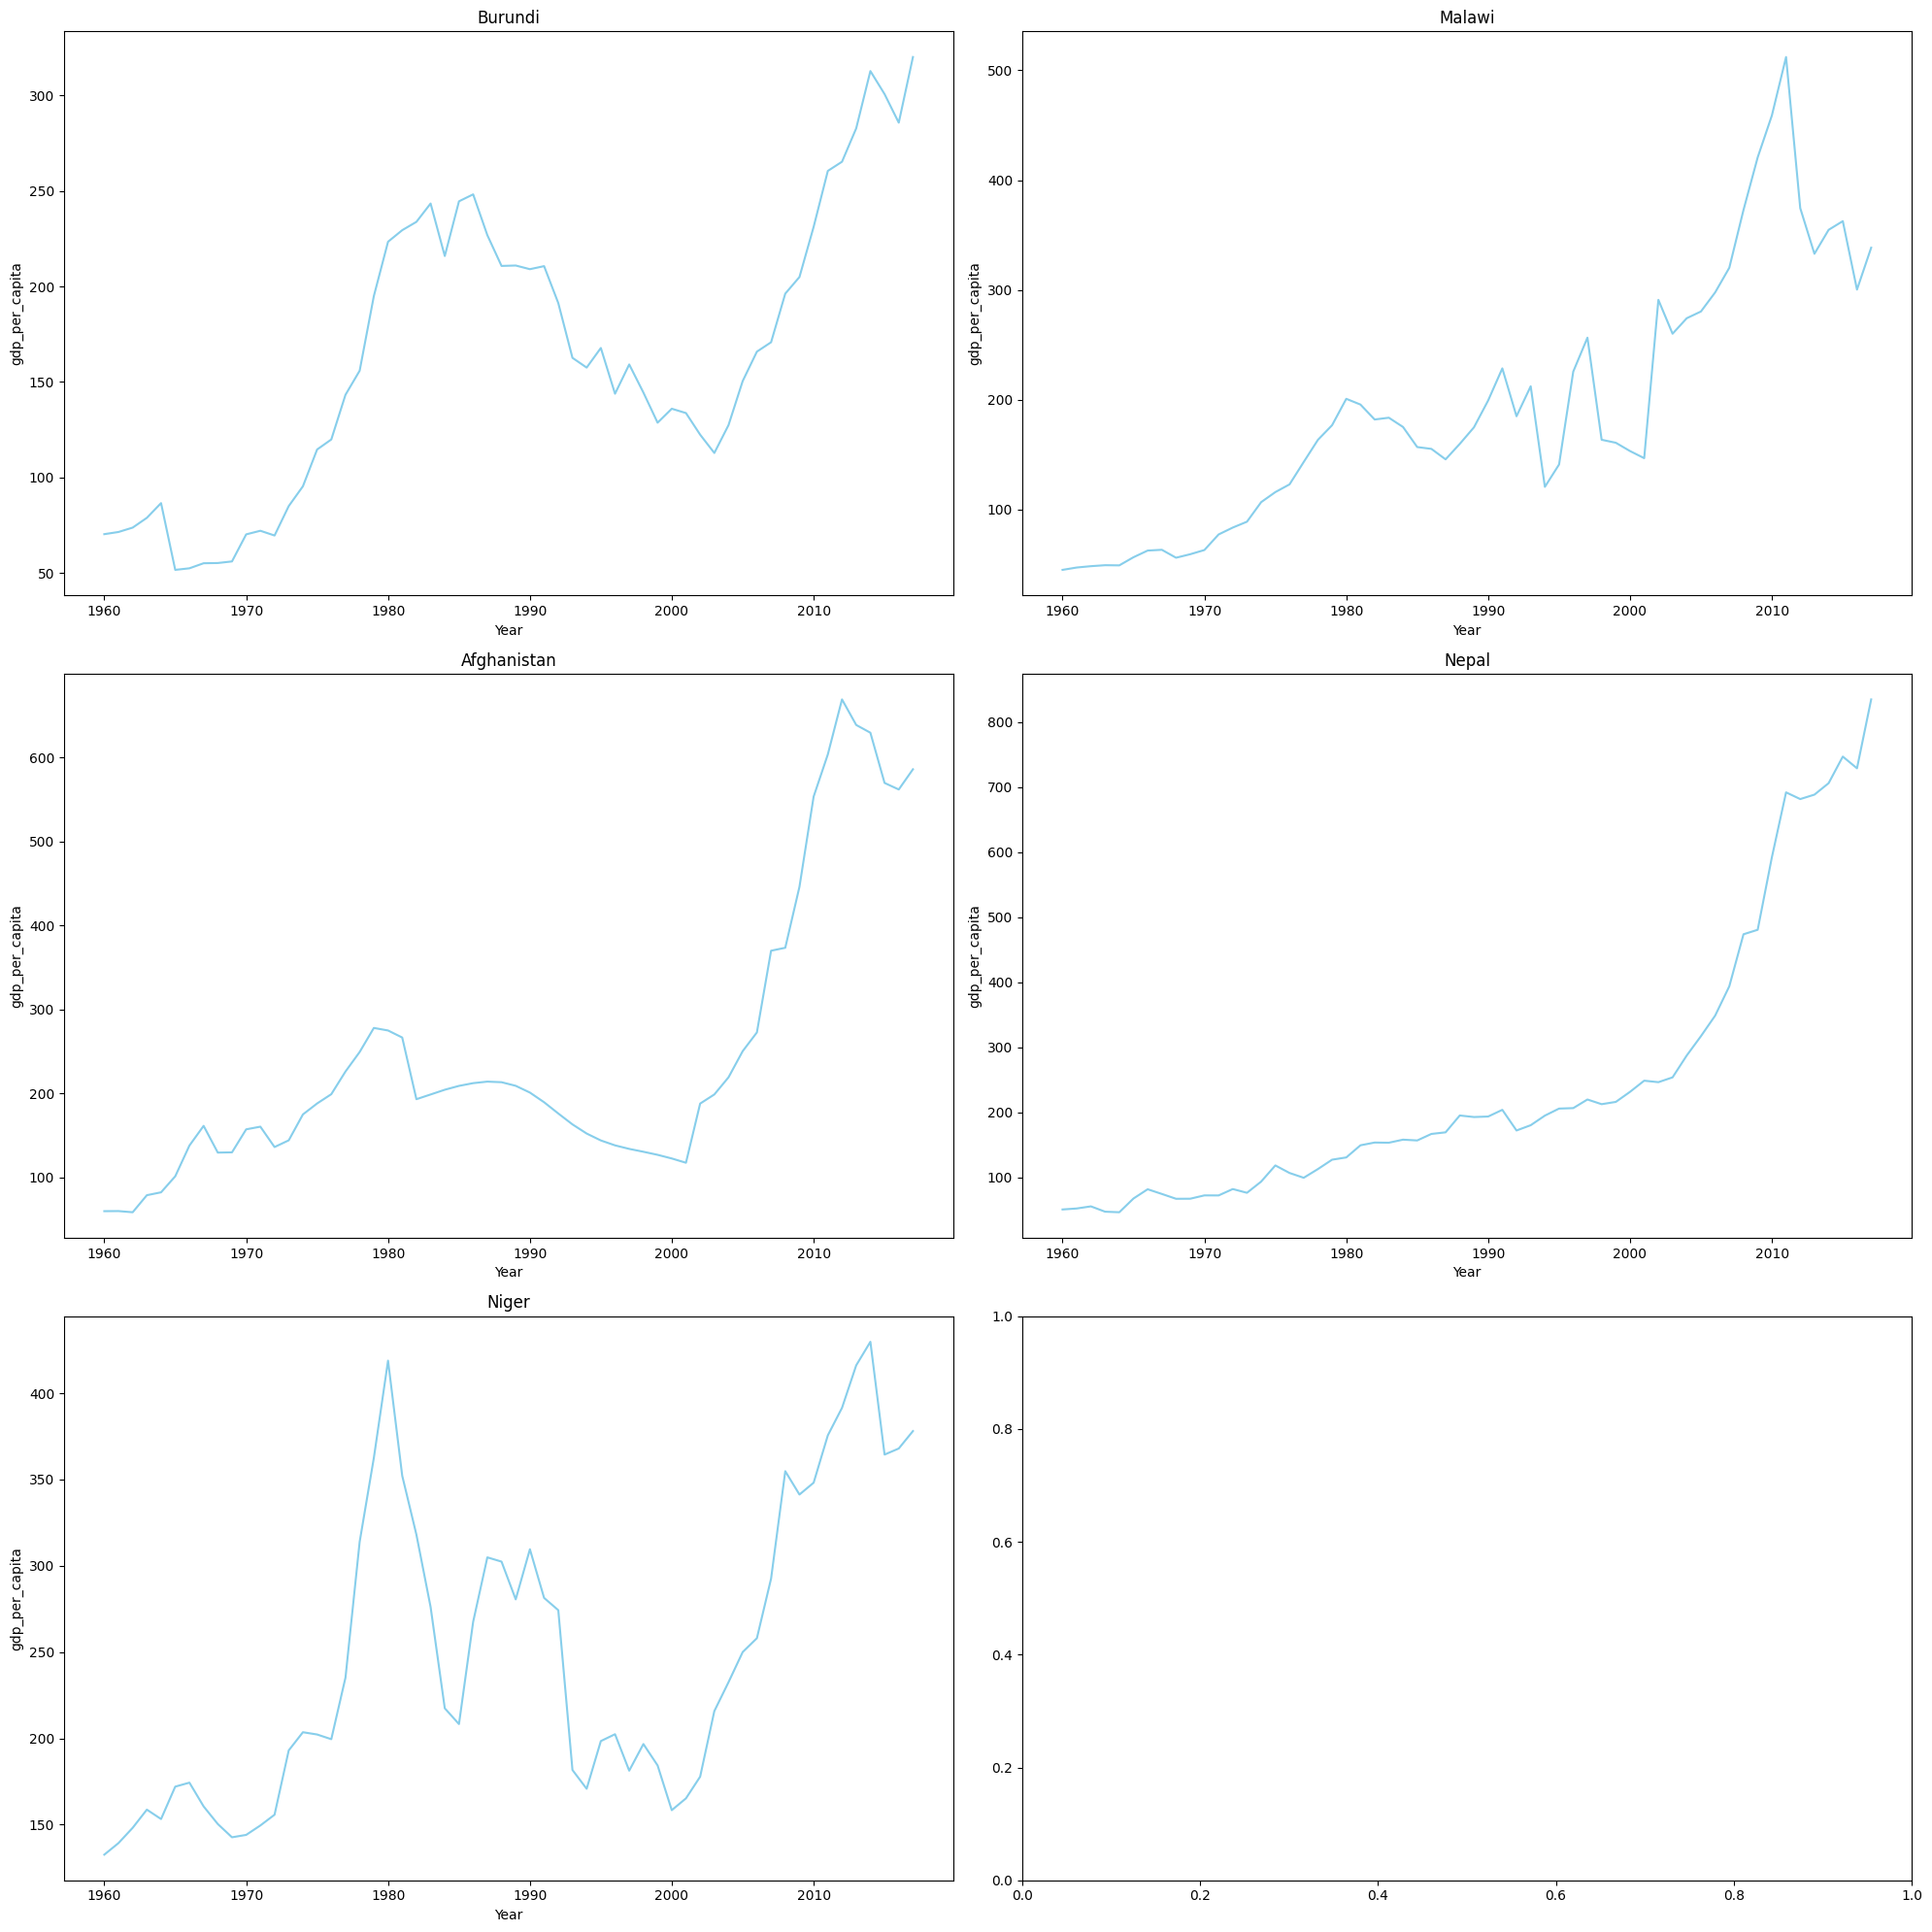

In [12]:
  

# Assuming your DataFrame is named 'merged_df'
# Aggregate gdp_per_capita data by country
country_gdp_per_capita = merged_df.groupby('country_name')['gdp_per_capita'].sum().reset_index()
# Select top 5 countries by total gdp_per_capita
top_5_countries_gdp_per_capita = country_gdp_per_capita.nsmallest(5, 'gdp_per_capita')

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each country's gdp_per_capita in a subplot
for i, (country, gdp_per_capita) in enumerate(zip(top_5_countries_gdp_per_capita['country_name'], top_5_countries_gdp_per_capita['gdp_per_capita'])):
    # Filter data for the current country
    country_data_gdp_per_capita = merged_df[merged_df['country_name'] == country]
    # Check if data for the current country is empty
    if not country_data_gdp_per_capita.empty:
        # Plot gdp_per_capita trend over years for the current country
        axes[i].plot(country_data_gdp_per_capita['year'].values, country_data_gdp_per_capita['gdp_per_capita'].values, color='skyblue')
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('gdp_per_capita')
    else:
        # Hide the subplot if data is empty
        fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()
